In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from IPython.core.display_functions import display
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_excel("./data/COVID-19-Constructed-Dataset-(PANEL).xlsx")  #read csv file and store in df
df

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod
0,1,0,6,M,1,59065.137,0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2
1,1,0,6,M,1,59065.137,0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4
2,1,0,6,M,1,59065.137,0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1
3,1,0,6,M,1,59065.137,0,5,3,1,0,68.552,55.633,73.728,69.650,48.294,86.596,3
4,1,0,6,M,1,59065.137,0,5,3,1,0,82.541,87.166,65.316,68.990,85.802,65.638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,M,1,65783.633,1,2,3,3,0,73.328,67.403,87.349,70.828,64.903,84.849,0
8396,1400,1,12,M,1,65783.633,1,2,3,3,3,58.970,84.165,64.041,56.470,81.665,61.541,2
8397,1400,1,12,M,1,65783.633,1,2,3,3,3,51.975,82.905,77.368,49.475,80.405,74.868,3
8398,1400,1,12,M,1,65783.633,1,2,3,3,3,64.104,47.847,81.086,61.604,45.347,78.586,1


# 3. Preprocessing
### 3-1. Categorical Data change to Numeric data

In [3]:
# Categorical Data change to Numeric Data
# 0 = Female, 1 = Male
encoder = OrdinalEncoder(dtype=np.int64)
X = pd.DataFrame(df['gender'])
encoder.fit(X)

# Deep copy
data_select = df.copy()
data_select['gender'] = pd.DataFrame(encoder.transform(X))

# Verify the data has been changed appropriately
data_select

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod
0,1,0,6,1,1,59065.137,0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2
1,1,0,6,1,1,59065.137,0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4
2,1,0,6,1,1,59065.137,0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1
3,1,0,6,1,1,59065.137,0,5,3,1,0,68.552,55.633,73.728,69.650,48.294,86.596,3
4,1,0,6,1,1,59065.137,0,5,3,1,0,82.541,87.166,65.316,68.990,85.802,65.638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,1,1,65783.633,1,2,3,3,0,73.328,67.403,87.349,70.828,64.903,84.849,0
8396,1400,1,12,1,1,65783.633,1,2,3,3,3,58.970,84.165,64.041,56.470,81.665,61.541,2
8397,1400,1,12,1,1,65783.633,1,2,3,3,3,51.975,82.905,77.368,49.475,80.405,74.868,3
8398,1400,1,12,1,1,65783.633,1,2,3,3,3,64.104,47.847,81.086,61.604,45.347,78.586,1


In [4]:
# timeperiod column name change 'online'
# divide online , NotOnline
# 0 = notOnline, 1 = online
for i in range(len(data_select)):
    sumOnline = 0
    sumNonOnline = 0
    if data_select.loc[i, 'timeperiod'] < 3:
        data_select.loc[i, 'timeperiod'] = 0
    else:
        data_select.loc[i, 'timeperiod'] = 1

# dataFrame column name change
data_select.rename(columns={'timeperiod': 'online'}, inplace=True)

# Display data for appropriately checking
data_select

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,online
0,1,0,6,1,1,59065.137,0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,0
1,1,0,6,1,1,59065.137,0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,1
2,1,0,6,1,1,59065.137,0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,0
3,1,0,6,1,1,59065.137,0,5,3,1,0,68.552,55.633,73.728,69.650,48.294,86.596,1
4,1,0,6,1,1,59065.137,0,5,3,1,0,82.541,87.166,65.316,68.990,85.802,65.638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,1,1,65783.633,1,2,3,3,0,73.328,67.403,87.349,70.828,64.903,84.849,0
8396,1400,1,12,1,1,65783.633,1,2,3,3,3,58.970,84.165,64.041,56.470,81.665,61.541,0
8397,1400,1,12,1,1,65783.633,1,2,3,3,3,51.975,82.905,77.368,49.475,80.405,74.868,1
8398,1400,1,12,1,1,65783.633,1,2,3,3,3,64.104,47.847,81.086,61.604,45.347,78.586,0


### 3-2. Deriving Features from Existing Features
#### 3-2-1. Make new feature from some features

In [5]:
# Find the average of the total subject grades
data_select['total'] = (data_select['readingscore'] + data_select['writingscore'] + data_select[
    'mathscore'] + data_select['readingscoreSL'] + data_select['writingscoreSL'] + data_select[
                            'mathscoreSL']) / 6

# Each grade data is dropped because the average of the total grade was obtained
dropCol = ['readingscore', 'writingscore', 'mathscore', 'readingscoreSL', 'writingscoreSL', 'mathscoreSL', 'covidpos']
data_select = data_select.drop(columns=dropCol)

data_select

,studentID,school,gradelevel,gender,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,online,total
0,1,0,6,1,59065.137,0,5,3,1,0,0,78.042
1,1,0,6,1,59065.137,0,5,3,1,0,1,67.117
2,1,0,6,1,59065.137,0,5,3,1,0,0,76.104
3,1,0,6,1,59065.137,0,5,3,1,0,1,67.076
4,1,0,6,1,59065.137,0,5,3,1,0,0,75.909
...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,1,65783.633,1,2,3,3,0,0,74.777
8396,1400,1,12,1,65783.633,1,2,3,3,3,0,67.809
8397,1400,1,12,1,65783.633,1,2,3,3,3,1,69.500
8398,1400,1,12,1,65783.633,1,2,3,3,3,0,63.095


In [6]:
# Create a data frame to store grade data according to student data (notOnine, Online)
data_transform = (data_select.iloc[:, :11]).copy()
data_transform.drop_duplicates(['studentID'], inplace=True)  # 중복되는 학생 ID를 가진 dataset 삭제
data_transform.reset_index(inplace=True)  # 인덱스 초기화
data_transform.drop(columns=['index'], inplace=True)  # index column 제거

# Calculate the average of grades per student (notOnine, Online)
for i in range(1, len(data_transform) + 1):
    condition0 = (data_select.studentID == i) & (data_select.online == 0)
    condition1 = (data_select.studentID == i) & (data_select.online == 1)
    temp0 = data_select.loc[condition0]
    temp1 = data_select.loc[condition1]
    data_transform.loc[i - 1, "totalNotOnline"] = (temp0.loc[:, "total"].sum() / 3)
    data_transform.loc[i - 1, "totalOnline"] = (temp1.loc[:, "total"].sum() / 3)
    data_transform.loc[i - 1, "differ"] = data_transform.loc[i - 1, "totalNotOnline"] - data_transform.loc[
        i - 1, "totalOnline"]

# Drop onilne column because not using
data_transform = data_transform.drop(columns="online")

# Display data for appropriately checking
data_transform

,studentID,school,gradelevel,gender,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,totalNotOnline,totalOnline,differ
0,1,0,6,1,59065.137,0,5,3,1,0,76.685,67.317,9.368
1,2,0,6,1,107480.086,1,4,1,1,1,77.301,69.185,8.116
2,3,0,6,1,79800.844,1,0,2,1,1,80.267,68.905,11.362
3,4,0,6,1,125976.164,1,2,3,1,2,85.052,75.503,9.549
4,5,0,6,0,110744.156,1,5,2,0,1,80.709,70.265,10.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,1,12,0,19891.385,0,2,2,1,1,67.364,61.227,6.137
1396,1397,1,12,0,24009.490,0,1,1,1,1,69.427,55.968,13.459
1397,1398,1,12,1,35121.309,1,1,4,2,1,73.711,69.847,3.865
1398,1399,1,12,1,54383.434,1,2,2,1,1,77.285,67.355,9.930


In [7]:
data_transform.describe()

,studentID,school,gradelevel,gender,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,totalNotOnline,totalOnline,differ
count,1400.000,1400.000,1400.000,1400.000,1400.000,1400.000,1400.000,1400.000,1400.000,1400.000,1400.000,1400.000,1400.000
mean,700.500,0.500,9.000,0.516,84290.222,0.846,2.324,2.071,1.324,1.278,77.322,69.370,7.952
std,404.290,0.500,2.001,0.500,37763.725,0.361,1.617,1.030,0.821,0.821,7.103,7.033,4.650
min,1.000,0.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,57.504,50.550,-8.536
25%,350.750,0.000,7.000,0.000,53210.645,1.000,1.000,1.000,1.000,1.000,71.982,63.742,5.076
50%,700.500,0.500,9.000,1.000,85214.332,1.000,2.000,2.000,1.000,1.000,77.992,69.917,8.070
75%,1050.250,1.000,11.000,1.000,115975.230,1.000,4.000,3.000,2.000,2.000,83.030,75.139,10.732
max,1400.000,1.000,12.000,1.000,179296.531,1.000,5.000,5.000,4.000,4.000,93.019,86.255,23.050


#### 3-2-2. Outlier Handling

In [8]:
def outliars(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)

    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR

    outliers_index = data[(data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step)].index
    return outliers_index

In [9]:
#price outlier handling
outliers_index = outliars(data_transform, "differ")

data_transform.drop(outliers_index, inplace=True)
data_transform.reset_index(drop=True, inplace=True)

data_transform.drop(data_transform[data_transform['differ'] == 0].index, inplace=True)
data_transform.reset_index(drop=True, inplace=True)

In [10]:
data_transform.describe()

,studentID,school,gradelevel,gender,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,totalNotOnline,totalOnline,differ
count,1374.000,1374.000,1374.000,1374.000,1374.000,1374.000,1374.000,1374.000,1374.000,1374.000,1374.000,1374.000,1374.000
mean,694.514,0.491,9.003,0.515,84848.126,0.848,2.342,2.072,1.324,1.278,77.408,69.455,7.953
std,403.911,0.500,1.999,0.500,37694.015,0.359,1.620,1.035,0.825,0.823,7.069,6.986,4.313
min,1.000,0.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,57.504,50.550,-3.376
25%,345.250,0.000,7.000,0.000,53810.698,1.000,1.000,1.000,1.000,1.000,72.018,63.876,5.116
50%,688.500,0.000,9.000,1.000,86907.711,1.000,2.000,2.000,1.000,1.000,78.048,69.969,8.070
75%,1043.750,1.000,11.000,1.000,116635.271,1.000,4.000,3.000,2.000,2.000,83.122,75.200,10.672
max,1400.000,1.000,12.000,1.000,179296.531,1.000,5.000,5.000,4.000,4.000,93.019,86.255,19.169


#### 3-2-3. Make new feature from 'total' column using clustering

In [11]:
# K-mean Clustering + Scaling
def clustering_scaling(data, i, k, scaler, relationCol, clusterName, xCol, yCol):
    data_scale = scaler.fit_transform(data.loc[:, relationCol])  #data scaling
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scale)  # learning scaling data
    data[clusterName] = model.fit_predict(data_scale)  # save each clustering data

    plt.figure(figsize=(8, 8))

    for i in range(k):
        plt.scatter(data.loc[data[clusterName] == i, xCol], data.loc[data[clusterName] == i, yCol],
                    label=clusterName + str(i))

    # make plot graph
    plt.legend()
    plt.title(str(scaler))
    plt.xlabel('totalNotOnline', size=12)
    plt.ylabel('totalOnline', size=12)

    return plt, data.groupby(clusterName).size()

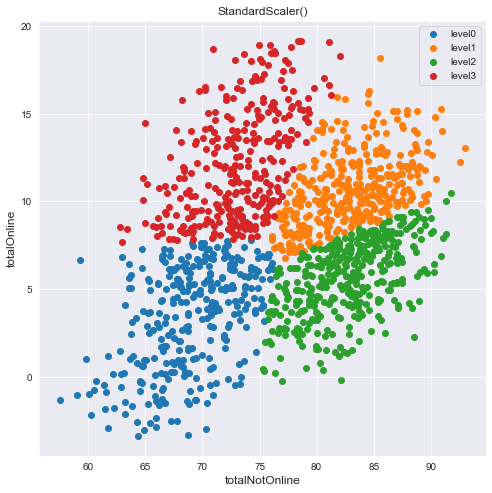

level
0    314
1    367
2    380
3    313
dtype: int64


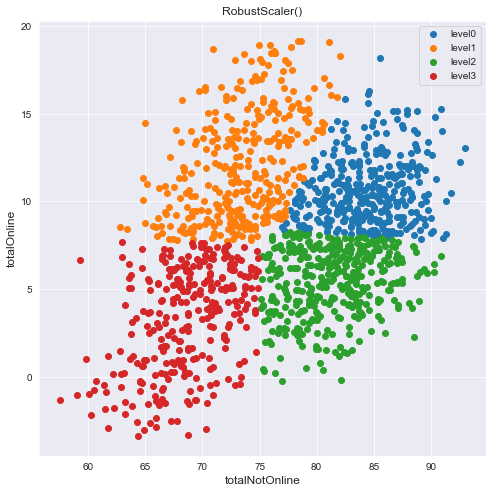

level
0    360
1    336
2    381
3    297
dtype: int64


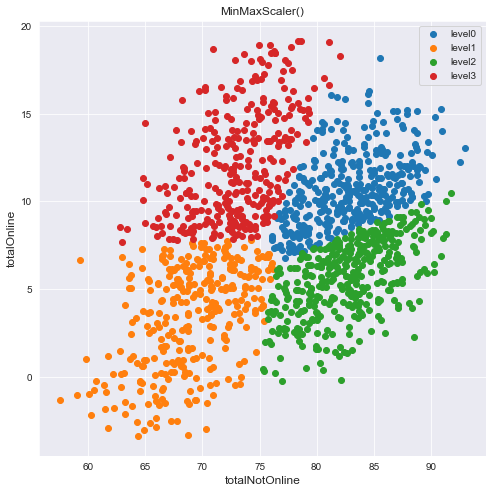

level
0    366
1    314
2    382
3    312
dtype: int64


In [12]:
data_transform_std = data_transform.copy()
data_transform_robust = data_transform.copy()
data_transform_minmax = data_transform.copy()
data_transform_list = [data_transform_std, data_transform_robust, data_transform_minmax]

scaler_list = [StandardScaler(), RobustScaler(), MinMaxScaler()]

for i in range(3):
    plt, groupData = clustering_scaling(data_transform_list[i], i, 4, scaler_list[i],
                                        ["totalNotOnline", "totalOnline", "differ"], "level",
                                        'totalNotOnline', 'differ')

    plt.show()
    print(groupData)

In [13]:
# Scaler + SelectKBest
def selectKBest_scaling(data, scaler, xCol, yCol):
    x = data.loc[:, xCol]  # select using columns
    y = data.loc[:, yCol]  # level
    scalerTemp = pd.DataFrame(scaler.fit_transform(x))

    scalerTemp.columns = [x.columns]

    bestfeatures = SelectKBest(score_func=f_regression, k=5)
    fit = bestfeatures.fit(x, y)
    dfcolumns = pd.DataFrame(x.columns)
    dfscores = pd.DataFrame(fit.scores_)

    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Features', 'Score']

    return featureScores.nlargest(10, 'Score')

In [14]:
x_columns = ["school", "gender", "householdincome", "freelunch", "numcomputers", "familysize", "fathereduc", "mothereduc", "totalNotOnline", "totalOnline"]
for i in range(3):
    print(scaler_list[i])
    print(selectKBest_scaling(data_transform_list[i], scaler_list[i], x_columns, "level"))
    print()

StandardScaler()
          Features  Score
8   totalNotOnline 46.435
9      totalOnline 20.680
4     numcomputers  1.904
5       familysize  1.243
1           gender  1.045
6       fathereduc  0.821
0           school  0.807
2  householdincome  0.396
7       mothereduc  0.312
3        freelunch  0.015

RobustScaler()
          Features   Score
8   totalNotOnline 726.449
0           school 283.554
2  householdincome 205.522
4     numcomputers  61.475
3        freelunch  45.951
9      totalOnline  31.481
7       mothereduc   3.663
1           gender   1.382
6       fathereduc   0.385
5       familysize   0.150

MinMaxScaler()
          Features   Score
0           school 180.860
9      totalOnline 160.847
2  householdincome 122.163
8   totalNotOnline  94.911
3        freelunch  36.796
4     numcomputers  31.757
7       mothereduc   1.757
6       fathereduc   1.365
5       familysize   0.491
1           gender   0.012



<AxesSubplot:>

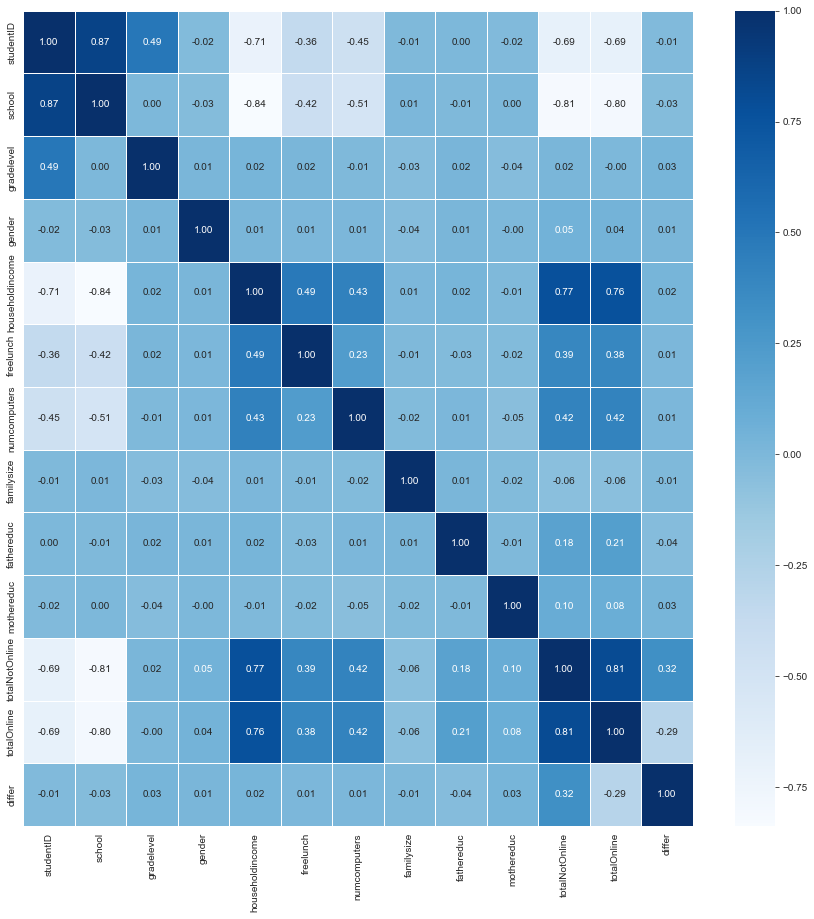

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data_transform.corr(), annot=True,
            fmt='.2f', linewidths=.5, cmap='Blues')

# 4. Modeling
### 4-1. Linear Regression each scaling & Evaluation

In [16]:
def linearRegScaling(scaler, k, data, testSize, largeColumns, target):
    data_scale = scaler.fit_transform(data.loc[:, largeColumns])  #data scaling

    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scale)  # learning scaling data
    data['predict'] = model.fit_predict(data_scale)  # save each clustering data

    x = data_scale  # school, totalNotOnline columns
    y = data.loc[:, target]  # level columns

    reg = linear_model.LinearRegression()

    # Split the dataset into training and testing
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testSize, random_state=42, shuffle=True)
    reg.fit(x_train, y_train)

    # Compute data and find result
    resultTrainScore = reg.score(x_train, y_train)
    resultTestScore = reg.score(x_test, y_test)

    # data collect
    return resultTrainScore, resultTestScore

In [17]:
# Split the dataset train:test & scaler
split = [0.1, 0.2, 0.3]
scaler = [StandardScaler(), RobustScaler(), MinMaxScaler()]
data_transform_list = [data_transform_std, data_transform_robust, data_transform_minmax]
largeColumns1 = ("school", "totalNotOnline")

# Create new empty data frame
resultBestScaler = pd.DataFrame(index=range(0, 9),
                                columns=["Scaler", "Train", "Test", "TrainSet Score", "TestSet Score"])

j = 0
for i in range(len(scaler)):
    for k in range(len(split)):
        resultTrainScore, resultTestScore = linearRegScaling(scaler[i], 4, data_transform_list[i], split[k],
                                                             largeColumns1, "level")
        resultBestScaler.iloc[j] = [str(scaler[i]), str(1 - split[k]), str(split[k]), resultTrainScore, resultTestScore]
        j += 1

display(resultBestScaler)

,Scaler,Train,Test,TrainSet Score,TestSet Score
0,StandardScaler(),0.9,0.1,0.090,-0.066
1,StandardScaler(),0.8,0.2,0.091,0.011
2,StandardScaler(),0.7,0.3,0.084,0.057
3,RobustScaler(),0.9,0.1,0.385,0.065
4,RobustScaler(),0.8,0.2,0.378,0.266
5,RobustScaler(),0.7,0.3,0.373,0.318
6,MinMaxScaler(),0.9,0.1,0.113,0.155
7,MinMaxScaler(),0.8,0.2,0.117,0.117
8,MinMaxScaler(),0.7,0.3,0.129,0.089


In [18]:
# Split the dataset train:test & scaler
split = [0.1, 0.2, 0.3]
scaler = [StandardScaler(), RobustScaler(), MinMaxScaler()]

# Create new empty data frame
resultBestScaler = pd.DataFrame(index=range(0, 9),
                                columns=["Scaler", "Train", "Test", "TrainSet Score", "TestSet Score"])

largeColumns2 = ("school", "totalNotOnline", "householdincome")
j = 0
for i in range(len(scaler)):
    for k in range(len(split)):
        resultTrainScore, resultTestScore = linearRegScaling(scaler[i], 4, data_transform_list[i], split[k],
                                                             largeColumns2, "level")
        resultBestScaler.iloc[j] = [str(scaler[i]), str(1 - split[k]), str(split[k]), resultTrainScore, resultTestScore]
        j += 1

display(resultBestScaler)

,Scaler,Train,Test,TrainSet Score,TestSet Score
0,StandardScaler(),0.9,0.1,0.099,-0.076
1,StandardScaler(),0.8,0.2,0.099,0.018
2,StandardScaler(),0.7,0.3,0.090,0.068
3,RobustScaler(),0.9,0.1,0.395,0.085
4,RobustScaler(),0.8,0.2,0.387,0.282
5,RobustScaler(),0.7,0.3,0.382,0.332
6,MinMaxScaler(),0.9,0.1,0.113,0.152
7,MinMaxScaler(),0.8,0.2,0.117,0.117
8,MinMaxScaler(),0.7,0.3,0.129,0.088


#### -> Best Score is RobustScaler Result
<br><hr><br>

### 4-2. Model Evaluation Metrics for Regression

In [19]:
# Split the dataset into 5 subsets of equal size
def modelEvaluation(type, largeColumns, target, testSize):
    data_scale = data_transform_list[type].loc[:, largeColumns]  #data scaling

    x = scaler_list[type].fit_transform(data_scale)  # "totalNotOnline", "totalOnline" columns data
    y = data_transform_list[type].loc[:, target]  # level columns

    reg = linear_model.LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testSize, random_state=42, shuffle=True)
    reg.fit(x_train, y_train)
    y_pred = pd.DataFrame(reg.predict(x_test))

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))

    return mae, mse, rmse

In [20]:
# Create new empty data frame
evaluationMetrix = pd.DataFrame(index=range(0, 3),
                                columns=["Scaler", "MAE", "MSE", "RMSE"])

for i in range(3):  # StandardScaler, RobustScaler, MinMaxScaler
    mae, mse, rmse = modelEvaluation(i, largeColumns1, "level", 0.2)
    evaluationMetrix.iloc[i, :] = [scaler_list[i], mae, mse, rmse]  # Dataframe 데이터 추가

display(evaluationMetrix)

,Scaler,MAE,MSE,RMSE
0,StandardScaler(),0.946,1.153,0.973
1,RobustScaler(),0.818,0.820,0.905
2,MinMaxScaler(),1.025,1.139,1.012


In [21]:
# Create new empty data frame
evaluationMetrix = pd.DataFrame(index=range(0, 3),
                                columns=["Scaler", "MAE", "MSE", "RMSE"])

for i in range(3):  # StandardScaler, RobustScaler, MinMaxScaler
    mae, mse, rmse = modelEvaluation(i, largeColumns2, "level", 0.2)
    evaluationMetrix.iloc[i, :] = [scaler_list[i], mae, mse, rmse]  # Dataframe 데이터 추가

display(evaluationMetrix)

,Scaler,MAE,MSE,RMSE
0,StandardScaler(),0.946,1.145,0.972
1,RobustScaler(),0.804,0.802,0.897
2,MinMaxScaler(),1.025,1.138,1.012


# 5. Learning model evaluation and analysis
### 5-1. Confusion Matrix

In [22]:
confusion_matrix(data_transform_robust.loc[:, "level"], data_transform_robust.loc[:, "predict"])

array([[142,   0,  15, 203],
       [ 14,  93, 229,   0],
       [198,   0,  44, 139],
       [  4, 221,  72,   0]])

<AxesSubplot:xlabel='Predict', ylabel='Actual'>

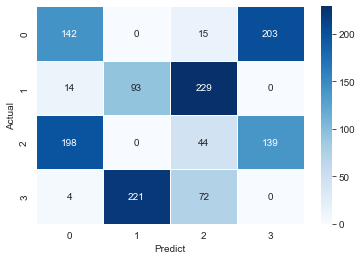

In [23]:
data_confusion = {"Actual": data_transform_robust.loc[:, "level"],
                  "Predict": data_transform_robust.loc[:, "predict"]}
dataframe_confusion = pd.DataFrame(data_confusion, columns=["Actual", "Predict"])
confusion_matrix = pd.crosstab(dataframe_confusion["Actual"], dataframe_confusion["Predict"])

sns.heatmap(confusion_matrix, annot=True, fmt='.0f', linewidths=.5, cmap='Blues')

In [24]:
def precisionRecall(matrix, column):
    precision = np.zeros(len(column))
    recall = np.zeros(len(column))
    for i in range(len(column)):
        precision[i] += matrix.iloc[i, i] / matrix.iloc[:, i].sum()
        recall[i] += matrix.iloc[i, i] / matrix.iloc[i, :].sum()

    return precision, recall

In [25]:
y_true = np.array(data_transform_robust["level"])
y_pred = np.array(data_transform_robust["predict"])
confusion_matrix_result = pd.DataFrame(confusion_matrix, columns=[0, 1, 2, 3], index=[0, 1, 2, 3])
precision, recall = precisionRecall(confusion_matrix_result, confusion_matrix.columns)

print("Precision (0): %.2f" % precision[0])
print("Precision (1): %.2f" % precision[1])
print("Precision (2): %.2f" % precision[2])
print("Precision (3): %.2f" % precision[3])
print("Recall (0): %.2f" % recall[0])
print("Recall (1): %.2f" % recall[1])
print("Recall (2): %.2f" % recall[2])
print("Recall (3): %.2f" % recall[3])

Precision (0): 0.40
Precision (1): 0.30
Precision (2): 0.12
Precision (3): 0.00
Recall (0): 0.39
Recall (1): 0.28
Recall (2): 0.12
Recall (3): 0.00
